<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [182]:
# Código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from matplotlib import pyplot
from ipywidgets import interactive
warnings.filterwarnings('ignore')

## 1.1 Inspección del dataframe

Se ha escogido la base de datos de las pruebas Saber Pro desde 2014-2 hasta 2015-2 puesto que este fue el periodo de inicio de una modificación a las pruebas. Estos cambios en el examen permitian evaluar competencias de pensamiento más que conocimientos específicos, llevando a un mejor diagnóstico de los estudiantes a evaluar.

Para ello se procede a inspeccionar las bases de los tres periodos correspondientes y evaluar la cantidad de variables relevantes, observaciones, datos faltantes y demás.

In [2]:
#Carga de la base de datos de las pruebas correspondientes al periodo 2014-2.
PrSaber20142 = pd.read_csv("./Archivos/SB11_20142.txt", sep = "¬", encoding='utf8', engine='python')
PrSaber20142.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,...,DECIL_COMP_CIUDADANA,PUNT_INGLES,DECIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,ESTU_PUESTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_PILOPAGA
0,TI,COLOMBIA,F,28/02/1997,20142,SB11201420024642,ESTUDIANTE,COLOMBIA,Ninguno,NaN,...,4,45,3,A-,211,817.0,51.320597,NSE3,PUBLICAR,NO
1,TI,COLOMBIA,F,02/11/1995,20142,SB11201420024608,ESTUDIANTE,COLOMBIA,Ninguno,NaN,...,3,47,4,A-,222,723.0,51.564978,NSE3,PUBLICAR,NO
2,TI,COLOMBIA,F,30/01/1998,20142,SB11201420024615,ESTUDIANTE,COLOMBIA,Ninguno,NaN,...,6,46,4,A-,247,487.0,53.001992,NSE3,PUBLICAR,NO
3,TI,COLOMBIA,M,02/05/1996,20142,SB11201420024662,ESTUDIANTE,COLOMBIA,Ninguno,NaN,...,1,42,2,A-,203,876.0,40.954171,NSE1,PUBLICAR,NO
4,TI,COLOMBIA,M,21/01/1998,20142,SB11201420024619,ESTUDIANTE,COLOMBIA,Ninguno,NaN,...,9,57,9,A1,286,192.0,53.380433,NSE3,PUBLICAR,NO


In [3]:
PrSaber20142.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544535 entries, 0 to 544534
Columns: 138 entries, ESTU_TIPODOCUMENTO to ESTU_PILOPAGA
dtypes: float64(8), int64(22), object(108)
memory usage: 573.3+ MB


In [4]:
PrSaber20142.describe()

,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_TOTALALUMNOSCURSO,ESTU_COD_MCPIOIESDESEADA,ESTU_COD_PROGRAMADESEADO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,...,DECIL_SOCIALES_CIUDADANAS,PUNT_RAZONA_CUANTITATIVO,DECIL_RAZONA_CUANTITATIVO,PUNT_COMP_CIUDADANA,DECIL_COMP_CIUDADANA,PUNT_INGLES,DECIL_INGLES,PUNT_GLOBAL,ESTU_PUESTO,ESTU_INSE_INDIVIDUAL
count,544535.0,544382.000000,544382.000000,55881.000000,54139.000000,55881.000000,544535.000000,5.444400e+05,5.445350e+05,544535.000000,...,544535.000000,544535.000000,544535.000000,544535.000000,544535.00000,544535.000000,544535.000000,544535.000000,544534.000000,542538.000000
mean,20142.0,32.548407,32778.739516,31.291942,29733.957812,34.895779,78311.642335,2.044349e+11,2.053037e+11,32812.600050,...,5.298014,50.033456,5.322126,50.011850,5.27810,50.025199,5.220427,250.030621,501.487250,49.584088
std,0.0,26.528681,26556.763655,9.319367,26487.284379,25.159071,53010.479556,9.346199e+10,9.564970e+10,26551.282841,...,2.854319,10.039306,2.856071,10.050939,2.88011,9.913691,2.975335,43.081300,289.084539,9.669812
min,20142.0,5.000000,5001.000000,1.000000,5001.000000,1.000000,18.000000,1.050010e+11,1.050010e+11,5001.000000,...,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,17.078766
25%,20142.0,11.000000,11001.000000,26.000000,11001.000000,12.000000,28217.000000,1.170010e+11,1.170420e+11,11001.000000,...,3.000000,44.000000,3.000000,43.000000,3.00000,44.000000,2.000000,219.000000,250.000000,42.548921
50%,20142.0,20.000000,20013.000000,32.000000,13001.000000,30.000000,77289.000000,1.730010e+11,1.730010e+11,20060.000000,...,5.000000,49.000000,5.000000,50.000000,5.00000,48.000000,5.000000,246.000000,501.000000,49.188536
75%,20142.0,54.000000,54001.000000,37.000000,54001.000000,50.000000,122242.000000,3.052500e+11,3.052660e+11,54001.000000,...,8.000000,56.000000,8.000000,56.000000,7.00000,53.000000,8.000000,277.000000,754.000000,55.617785
max,20142.0,99.000000,99773.000000,99.000000,99999.000000,99.000000,190686.000000,8.548740e+11,8.548740e+11,99773.000000,...,10.000000,100.000000,10.000000,100.000000,10.00000,100.000000,10.000000,482.000000,1000.000000,86.204536


In [5]:
#Carga de la base de datos de las pruebas correspondientes al periodo 2015-1.
PrSaber20151 = pd.read_csv("./Archivos/SB11_20151.txt", sep = "¬", encoding='utf8', engine='python')
PrSaber20151.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,...,DECIL_COMP_CIUDADANA,PUNT_INGLES,DECIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,ESTU_PUESTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_PILOPAGA
0,CC,COLOMBIA,F,16/11/1996,20151,SB11201510093906,ESTUDIANTE,COLOMBIA,NaN,NaN,...,3,49,4,A-,262,510,57.326141,NSE3,PUBLICAR,NO
1,CC,COLOMBIA,F,20/10/1995,20151,SB11201510093899,ESTUDIANTE,COLOMBIA,Ninguno,NaN,...,2,40,1,A-,177,955,49.384793,NSE2,PUBLICAR,NO
2,CC,COLOMBIA,F,31/05/1996,20151,SB11201510093903,ESTUDIANTE,COLOMBIA,Ninguno,NaN,...,2,43,2,A-,212,787,41.987318,NSE2,PUBLICAR,NO
3,CC,COLOMBIA,M,14/01/1988,20151,SB11201510094628,ESTUDIANTE,COLOMBIA,Ninguno,NaN,...,5,45,3,A-,246,593,43.732891,NSE2,PUBLICAR,NO
4,TI,COLOMBIA,F,28/09/1997,20151,SB11201510093524,ESTUDIANTE,COLOMBIA,Ninguno,NaN,...,1,40,1,A-,206,820,43.559879,NSE2,PUBLICAR,NO


In [6]:
PrSaber20151.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25947 entries, 0 to 25946
Columns: 131 entries, ESTU_TIPODOCUMENTO to ESTU_PILOPAGA
dtypes: float64(7), int64(23), object(101)
memory usage: 25.9+ MB


In [7]:
PrSaber20151.describe()

,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_TOTALALUMNOSCURSO,ESTU_COD_MCPIOIESDESEADA,ESTU_COD_PROGRAMADESEADO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,...,DECIL_SOCIALES_CIUDADANAS,PUNT_RAZONA_CUANTITATIVO,DECIL_RAZONA_CUANTITATIVO,PUNT_COMP_CIUDADANA,DECIL_COMP_CIUDADANA,PUNT_INGLES,DECIL_INGLES,PUNT_GLOBAL,ESTU_PUESTO,ESTU_INSE_INDIVIDUAL
count,25947.0,25945.000000,25945.000000,6164.000000,5807.000000,6164.000000,25947.000000,2.594300e+04,2.594700e+04,25947.000000,...,25947.000000,25947.000000,25947.000000,25947.000000,25947.000000,25947.000000,25947.000000,25947.000000,25947.000000,25943.000000
mean,20151.0,43.390480,39631.136828,26.837930,37761.806268,33.038936,84499.511234,3.352498e+11,3.365867e+11,39881.395113,...,5.403823,56.146568,5.347054,54.321694,5.400123,58.291787,5.267468,274.569777,498.587891,60.799854
std,0.0,621.314657,30247.910843,10.877924,31105.723846,26.012112,52462.166189,6.802184e+10,7.089570e+10,30087.751216,...,2.894751,16.259010,2.910056,14.084071,2.837433,18.178439,2.982566,69.191185,289.171257,11.823254
min,20151.0,5.000000,5001.000000,1.000000,5001.000000,1.000000,182.000000,1.050010e+11,1.050010e+11,5001.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,51.000000,1.000000,23.890295
25%,20151.0,11.000000,11001.000000,20.000000,11001.000000,9.000000,31468.000000,3.110011e+11,3.110011e+11,11001.000000,...,3.000000,45.000000,3.000000,44.000000,3.000000,43.000000,2.000000,218.000000,247.000000,52.086126
50%,20151.0,25.000000,25175.000000,25.000000,17001.000000,27.000000,84988.000000,3.251750e+11,3.251750e+11,25175.000000,...,5.000000,54.000000,5.000000,54.000000,5.000000,50.000000,5.000000,265.000000,497.000000,60.260432
75%,20151.0,76.000000,76001.000000,32.000000,76001.000000,53.000000,124177.000000,3.760010e+11,3.760010e+11,76001.000000,...,8.000000,67.000000,8.000000,64.000000,8.000000,74.000000,8.000000,328.000000,748.000000,70.661940
max,20151.0,99999.000000,99999.000000,99.000000,99999.000000,99.000000,193409.000000,6.252690e+11,8.180011e+11,95001.000000,...,10.000000,100.000000,10.000000,100.000000,10.000000,100.000000,10.000000,488.000000,1000.000000,86.204167


In [8]:
#Carga de la base de datos de las pruebas correspondientes al periodo 2015-2.
PrSaber20152 = pd.read_csv("./Archivos/SB11_20152.txt", sep = "¬", encoding='utf8', engine='python')
PrSaber20152.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,...,DECIL_COMP_CIUDADANA,PUNT_INGLES,DECIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,ESTU_PUESTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_PILOPAGA
0,CR,COLOMBIA,M,14/12/1996,20152,SB11201520181280,ESTUDIANTE,COLOMBIA,No,NaN,...,8,55,8,A1,257,404,48.422458,NSE2,PUBLICAR,NO
1,TI,COLOMBIA,M,17/11/1997,20152,SB11201520569777,ESTUDIANTE,COLOMBIA,No,NaN,...,2,52,7,A1,187,930,54.159614,NSE3,PUBLICAR,NO
2,CC,COLOMBIA,M,14/10/1991,20152,SB11201520363446,ESTUDIANTE,COLOMBIA,No,NaN,...,5,46,4,A-,240,542,33.943107,NSE1,PUBLICAR,NO
3,TI,COLOMBIA,M,15/09/1998,20152,SB11201520059577,ESTUDIANTE,COLOMBIA,No,NaN,...,10,54,8,A1,253,437,65.641086,NSE4,PUBLICAR,NO
4,TI,COLOMBIA,M,23/05/1998,20152,SB11201520314171,ESTUDIANTE,COLOMBIA,No,NaN,...,5,37,1,A-,236,582,55.175088,NSE3,PUBLICAR,NO


In [9]:
PrSaber20152.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542450 entries, 0 to 542449
Data columns (total 89 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             542450 non-null  object 
 1   ESTU_NACIONALIDAD              542450 non-null  object 
 2   ESTU_GENERO                    539894 non-null  object 
 3   ESTU_FECHANACIMIENTO           542449 non-null  object 
 4   PERIODO                        542450 non-null  int64  
 5   ESTU_CONSECUTIVO               542450 non-null  object 
 6   ESTU_ESTUDIANTE                542450 non-null  object 
 7   ESTU_PAIS_RESIDE               542450 non-null  object 
 8   ESTU_TIENEETNIA                541374 non-null  object 
 9   ESTU_ETNIA                     33353 non-null   object 
 10  ESTU_LIMITA_MOTRIZ             552 non-null     object 
 11  ESTU_LIMITA_INVIDENTE          156 non-null     object 
 12  ESTU_LIMITA_CONDICIONESPECIAL 

In [10]:
PrSaber20152.describe()

,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,...,DECIL_SOCIALES_CIUDADANAS,PUNT_RAZONA_CUANTITATIVO,DECIL_RAZONA_CUANTITATIVO,PUNT_COMP_CIUDADANA,DECIL_COMP_CIUDADANA,PUNT_INGLES,DECIL_INGLES,PUNT_GLOBAL,ESTU_PUESTO,ESTU_INSE_INDIVIDUAL
count,542450.0,542447.000000,542447.000000,542450.000000,5.423870e+05,5.424500e+05,542450.000000,542450.000000,542364.000000,542364.000000,...,542450.000000,542450.000000,542450.000000,542450.000000,542450.000000,542450.000000,542450.000000,542450.000000,542450.000000,541295.000000
mean,20152.0,32.516026,32746.974086,80461.395421,2.049883e+11,2.058894e+11,32753.935777,32.522100,32688.514918,32.477141,...,5.301491,51.101438,5.327022,49.342597,5.289798,50.366596,5.190777,249.848329,498.953179,49.537567
std,0.0,26.576580,26604.879059,54565.572975,9.357483e+10,9.592770e+10,26575.761514,26.548513,26615.837354,26.586387,...,2.883699,13.419894,2.845735,9.924651,2.889952,10.914840,2.987586,46.983899,288.594924,9.688446
min,20152.0,5.000000,5001.000000,18.000000,1.050010e+11,1.050010e+11,5001.000000,5.000000,5001.000000,5.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,16.921914
25%,20152.0,11.000000,11001.000000,29181.000000,1.170420e+11,1.170880e+11,11001.000000,11.000000,11001.000000,11.000000,...,3.000000,42.000000,3.000000,43.000000,3.000000,43.000000,2.000000,216.000000,250.000000,42.509831
50%,20152.0,20.000000,20013.000000,79848.000000,1.730010e+11,1.730670e+11,20060.000000,20.000000,20011.000000,20.000000,...,5.000000,49.000000,5.000000,50.000000,5.000000,49.000000,5.000000,245.000000,497.000000,49.253793
75%,20152.0,54.000000,54001.000000,124883.000000,3.052370e+11,3.052660e+11,54001.000000,54.000000,54001.000000,54.000000,...,8.000000,59.000000,8.000000,57.000000,8.000000,54.000000,8.000000,278.000000,749.000000,55.485465
max,20152.0,99.000000,99773.000000,631622.000000,8.548740e+11,8.548740e+11,99773.000000,99.000000,99773.000000,99.000000,...,10.000000,100.000000,10.000000,100.000000,10.000000,100.000000,10.000000,492.000000,1000.000000,86.204167


## 1.2 Depuración de la base de datos. Selección de variables

Una vez analizadas las bases de datos por separado, se procede a identificar las variables relevantes a tener en cuenta para realizar el modelo. Para ello, se recurre al diccionario de las bases de datos que explica el propósito de medir la variable y el tipo de información que se recoger por medio de esta.

Se conservan las variables dummy de los tipos de discapacidad que serán consolidadas en una sola variable dummy que denote o no la presencia de esta condición.También se almacenan las variables demográficas de residencia como el departamento y municipio y el área (urbana o rural) de residencia. Adicionalmente se conservó la variable del numero de veces que presento el exámen. El estrato y los ingresos se mantienen en la base final, puesto que son indicadores de la situación socioeconómica de la familia a la que pertenece el estudiante. Las variables como si tiene computador u otros electrodomesticos se han omitido puesto que estan de cierta manera correlacionadas con el nivel de ingresos del hogar. Se considera también si el trabajar o no y el recibir salario o no por ello, como una variable que pueda influir en los resultados de la prueba. Finalmente, algunas variables que indicar las condiciones de la institución educativa a la que pertenece como si es oficial o no oficial, calendario y el puntaje de la prueba.

In [11]:
df_20142=PrSaber20142[["ESTU_GENERO","PERIODO", "ESTU_CONSECUTIVO", "ESTU_ETNIA", "ESTU_LIMITA_MOTRIZ", "ESTU_LIMITA_INVIDENTE",
                          "ESTU_LIMITA_CONDICIONESPECIAL", "ESTU_LIMITA_SORDO", "ESTU_LIMITA_SDOWN", "ESTU_LIMITA_AUTISMO",
                          "ESTU_DEPTO_RESIDE", "ESTU_MCPIO_RESIDE", "ESTU_AREARESIDE", "ESTU_VECESPRESENTOEXAMEN",
                          "FAMI_ESTRATOVIVIENDA", "FAMI_INGRESOFMILIARMENSUAL", "ESTU_TRABAJAACTUALMENTE", "ESTU_RECIBESALARIO",
                          "COLE_NATURALEZA", "COLE_CALENDARIO", "PUNT_GLOBAL", "ESTU_PUESTO", "ESTU_PILOPAGA"]]
df_20142["discapacidad"] = 0

df_20151=PrSaber20151[["ESTU_GENERO", "PERIODO", "ESTU_CONSECUTIVO", "ESTU_ETNIA", "ESTU_LIMITA_MOTRIZ", "ESTU_LIMITA_INVIDENTE",
                          "ESTU_LIMITA_CONDICIONESPECIAL", "ESTU_LIMITA_SORDO", "ESTU_LIMITA_SDOWN", "ESTU_LIMITA_AUTISMO",
                          "ESTU_DEPTO_RESIDE", "ESTU_MCPIO_RESIDE", "ESTU_AREARESIDE", "ESTU_VECESPRESENTOEXAMEN",
                          "FAMI_ESTRATOVIVIENDA", "FAMI_INGRESOFMILIARMENSUAL", "ESTU_TRABAJAACTUALMENTE", "ESTU_RECIBESALARIO",
                          "COLE_NATURALEZA", "COLE_CALENDARIO", "PUNT_GLOBAL", "ESTU_PUESTO", "ESTU_PILOPAGA"]]
df_20151["discapacidad"] = 0

df_20152=PrSaber20152[["ESTU_GENERO", "PERIODO", "ESTU_CONSECUTIVO", "ESTU_ETNIA", "ESTU_LIMITA_MOTRIZ", "ESTU_LIMITA_INVIDENTE",
                          "ESTU_LIMITA_CONDICIONESPECIAL", "ESTU_LIMITA_SORDO", "ESTU_LIMITA_SDOWN", "ESTU_LIMITA_AUTISMO",
                          "ESTU_DEPTO_RESIDE", "ESTU_MCPIO_RESIDE", "ESTU_AREARESIDE", "ESTU_VECESPRESENTOEXAMEN",
                          "FAMI_ESTRATOVIVIENDA", "FAMI_INGRESOFMILIARMENSUAL", "ESTU_TRABAJAACTUALMENTE", "ESTU_RECIBESALARIO",
                          "COLE_NATURALEZA", "COLE_CALENDARIO", "PUNT_GLOBAL", "ESTU_PUESTO", "ESTU_PILOPAGA"]]
df_20152["discapacidad"] = 0


Definimos las siguientes funciones para convertir las variables relativas a las discapacidades, en una sola variable llamada discapacidad. Esta toma el valor de 1 por cada observación si dicho individuo ha marcado que posee una o más de las discapacidades mencionadas en el enunciado. arreglar_dummy convierte a 1 y 0 las columnas de la discapacidad para que la funcion consolidar_dummy la pueda agregar en una sola variable.

In [12]:
def arreglar_dummy(df):
    
    for i in disc:
        df[i] = df[i].fillna(0)
        df[i] = (df[i] == "x")*1
    return df

# Generar variable dummy igual a 1 si tiene discapacidad y 0 si no la tiene.
disc = PrSaber20142[["ESTU_LIMITA_MOTRIZ", "ESTU_LIMITA_INVIDENTE", "ESTU_LIMITA_CONDICIONESPECIAL", "ESTU_LIMITA_SORDO",
                   "ESTU_LIMITA_SDOWN", "ESTU_LIMITA_AUTISMO"]]
disc.to_numpy().tolist()

#Consolidar las múltiples variables dummy de discapacidad en una sola que represente la presencia o ausencia de dicha condicion.

def consolidar_dummy(df):
    
    for i in range(len(df)):
        for j in disc:
            if df.iloc[i][j] == 1:
                df["discapacidad"][i] = 1

In [13]:
arreglar_dummy(df_20142)

,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL,ESTU_LIMITA_SORDO,ESTU_LIMITA_SDOWN,ESTU_LIMITA_AUTISMO,...,FAMI_ESTRATOVIVIENDA,FAMI_INGRESOFMILIARMENSUAL,ESTU_TRABAJAACTUALMENTE,ESTU_RECIBESALARIO,COLE_NATURALEZA,COLE_CALENDARIO,PUNT_GLOBAL,ESTU_PUESTO,ESTU_PILOPAGA,discapacidad
0,F,20142,SB11201420024642,Ninguno,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,211,817.0,NO,0
1,F,20142,SB11201420024608,Ninguno,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,222,723.0,NO,0
2,F,20142,SB11201420024615,Ninguno,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,247,487.0,NO,0
3,M,20142,SB11201420024662,Ninguno,0,0,0,0,0,0,...,Estrato 2,Menos de 1 SMLV,No,NaN,NO OFICIAL,A,203,876.0,NO,0
4,M,20142,SB11201420024619,Ninguno,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,286,192.0,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544530,F,20142,SB11201420201560,Ninguno,0,0,0,0,0,0,...,Estrato 1,Entre 1 y menos de 2 SMLV,No,NaN,OFICIAL,A,254,424.0,NO,0
544531,M,20142,SB11201420207430,Ninguno,0,0,0,0,0,0,...,Estrato 1,Entre 1 y menos de 2 SMLV,No,NaN,OFICIAL,A,177,982.0,NO,0
544532,M,20142,SB11201420442053,Ninguno,0,0,0,0,0,0,...,Estrato 1,Menos de 1 SMLV,"Si, 20 horas o más a la semana",Si,NO OFICIAL,A,190,944.0,NO,0
544533,F,20142,SB11201420210897,Ninguno,0,0,0,0,0,0,...,Estrato 2,Entre 3 y menos de 5 SMLV,No,NaN,OFICIAL,A,192,937.0,NO,0


In [14]:
consolidar_dummy(df_20142)

In [15]:
df_20142["discapacidad"].describe()

count    544535.000000
mean          0.002207
std           0.046931
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: discapacidad, dtype: float64

In [16]:
df_20142["discapacidad"].sum()

1202

In [17]:
arreglar_dummy(df_20151)

,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL,ESTU_LIMITA_SORDO,ESTU_LIMITA_SDOWN,ESTU_LIMITA_AUTISMO,...,FAMI_ESTRATOVIVIENDA,FAMI_INGRESOFMILIARMENSUAL,ESTU_TRABAJAACTUALMENTE,ESTU_RECIBESALARIO,COLE_NATURALEZA,COLE_CALENDARIO,PUNT_GLOBAL,ESTU_PUESTO,ESTU_PILOPAGA,discapacidad
0,F,20151,SB11201510093906,NaN,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,"Si, menos de 20 horas a la semana",Si,OFICIAL,A,262,510,NO,0
1,F,20151,SB11201510093899,Ninguno,0,0,0,0,0,0,...,Estrato 1,Entre 1 y menos de 2 SMLV,No,NaN,OFICIAL,A,177,955,NO,0
2,F,20151,SB11201510093903,Ninguno,0,0,0,0,0,0,...,Estrato 1,Entre 1 y menos de 2 SMLV,No,NaN,OFICIAL,A,212,787,NO,0
3,M,20151,SB11201510094628,Ninguno,0,0,0,0,0,0,...,Estrato 1,Menos de 1 SMLV,"Si, 20 horas o más a la semana",Si,OFICIAL,A,246,593,NO,0
4,F,20151,SB11201510093524,Ninguno,0,0,0,0,0,0,...,Estrato 1,Menos de 1 SMLV,No,NaN,OFICIAL,A,206,820,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25942,F,20151,SB11201510100089,Ninguno,0,0,0,0,0,0,...,Estrato 2,Entre 2 y menos de 3 SMLV,No,NaN,NO OFICIAL,A,212,785,NO,0
25943,F,20151,SB11201510101107,Ninguno,0,0,0,0,0,0,...,Estrato 2,Menos de 1 SMLV,No,NaN,NO OFICIAL,A,199,857,NO,0
25944,M,20151,SB11201510101203,Ninguno,0,0,0,0,0,0,...,Estrato 1,Entre 2 y menos de 3 SMLV,No,NaN,NO OFICIAL,A,220,737,NO,0
25945,M,20151,SB11201510103893,Ninguno,0,0,0,0,0,0,...,Estrato 3,Menos de 1 SMLV,No,NaN,NO OFICIAL,A,197,868,NO,0


In [18]:
consolidar_dummy(df_20151)

In [19]:
df_20151["discapacidad"].describe()

count    25947.000000
mean         0.002505
std          0.049989
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: discapacidad, dtype: float64

In [20]:
df_20151["discapacidad"].sum()

65

In [21]:
arreglar_dummy(df_20152)

,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL,ESTU_LIMITA_SORDO,ESTU_LIMITA_SDOWN,ESTU_LIMITA_AUTISMO,...,FAMI_ESTRATOVIVIENDA,FAMI_INGRESOFMILIARMENSUAL,ESTU_TRABAJAACTUALMENTE,ESTU_RECIBESALARIO,COLE_NATURALEZA,COLE_CALENDARIO,PUNT_GLOBAL,ESTU_PUESTO,ESTU_PILOPAGA,discapacidad
0,M,20152,SB11201520181280,NaN,0,0,0,0,0,0,...,Estrato 1,Menos de 1 SMLV,No,NaN,OFICIAL,A,257,404,NO,0
1,M,20152,SB11201520569777,NaN,0,0,0,0,0,0,...,Estrato 1,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,187,930,NO,0
2,M,20152,SB11201520363446,NaN,0,0,0,0,0,0,...,Estrato 1,Menos de 1 SMLV,No,NaN,OFICIAL,A,240,542,NO,0
3,M,20152,SB11201520059577,NaN,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,253,437,NO,0
4,M,20152,SB11201520314171,NaN,0,0,0,0,0,0,...,Estrato 2,Entre 2 y menos de 3 SMLV,No,NaN,OFICIAL,A,236,582,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542445,F,20152,SB11201520419226,NaN,0,0,0,0,0,0,...,Estrato 1,Menos de 1 SMLV,No,NaN,OFICIAL,A,223,693,NO,0
542446,F,20152,SB11201520451647,Comunidad afrodescendiente,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,OFICIAL,A,219,726,NO,0
542447,F,20152,SB11201520136450,NaN,0,0,0,0,0,0,...,Estrato 1,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,228,653,NO,0
542448,M,20152,SB11201520266454,NaN,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,270,299,NO,0


In [22]:
consolidar_dummy(df_20152)

In [23]:
df_20152["discapacidad"].describe()

count    542450.000000
mean          0.002273
std           0.047622
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: discapacidad, dtype: float64

In [24]:
df_20152["discapacidad"].sum()

1233

In [25]:
# Unión de las bases de datos.
resultados = df_20142.append(df_20151)
resultados = resultados.append(df_20152)
resultados

,ESTU_GENERO,PERIODO,ESTU_CONSECUTIVO,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL,ESTU_LIMITA_SORDO,ESTU_LIMITA_SDOWN,ESTU_LIMITA_AUTISMO,...,FAMI_ESTRATOVIVIENDA,FAMI_INGRESOFMILIARMENSUAL,ESTU_TRABAJAACTUALMENTE,ESTU_RECIBESALARIO,COLE_NATURALEZA,COLE_CALENDARIO,PUNT_GLOBAL,ESTU_PUESTO,ESTU_PILOPAGA,discapacidad
0,F,20142,SB11201420024642,Ninguno,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,211,817.0,NO,0
1,F,20142,SB11201420024608,Ninguno,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,222,723.0,NO,0
2,F,20142,SB11201420024615,Ninguno,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,247,487.0,NO,0
3,M,20142,SB11201420024662,Ninguno,0,0,0,0,0,0,...,Estrato 2,Menos de 1 SMLV,No,NaN,NO OFICIAL,A,203,876.0,NO,0
4,M,20142,SB11201420024619,Ninguno,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,286,192.0,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542445,F,20152,SB11201520419226,NaN,0,0,0,0,0,0,...,Estrato 1,Menos de 1 SMLV,No,NaN,OFICIAL,A,223,693.0,NO,0
542446,F,20152,SB11201520451647,Comunidad afrodescendiente,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,OFICIAL,A,219,726.0,NO,0
542447,F,20152,SB11201520136450,NaN,0,0,0,0,0,0,...,Estrato 1,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,228,653.0,NO,0
542448,M,20152,SB11201520266454,NaN,0,0,0,0,0,0,...,Estrato 2,Entre 1 y menos de 2 SMLV,No,NaN,NO OFICIAL,A,270,299.0,NO,0


In [26]:
resultados["discapacidad"].sum()

2500

In [27]:
#Exploración de la base de datos resultante del append.
resultados.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,PERIODO,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL,ESTU_LIMITA_SORDO,ESTU_LIMITA_SDOWN,ESTU_LIMITA_AUTISMO,PUNT_GLOBAL,ESTU_PUESTO,discapacidad
count,1.11293e+06,1.11293e+06,1.11293e+06,1.11293e+06,1.11293e+06,1.11293e+06,1.11293e+06,1.11293e+06,1.11293e+06,1.11293e+06
mean,20147.1,0.000955135,0.000291123,0.000575956,0.000211154,0.00014017,0.000351324,250.514,500.185,0.00224632
std,4.97827,0.0308905,0.0170598,0.0239922,0.0145296,0.0118385,0.0187404,45.929,288.851,0.0473421
min,20142,0,0,0,0,0,0,0,1,0
25%,20142,0,0,0,0,0,0,218,250,0
50%,20151,0,0,0,0,0,0,246,501,0
75%,20152,0,0,0,0,0,0,278,750,0
max,20152,1,1,1,1,1,1,492,1000,1


In [28]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112932 entries, 0 to 542449
Data columns (total 24 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ESTU_GENERO                    1109867 non-null  object 
 1   PERIODO                        1112932 non-null  int64  
 2   ESTU_CONSECUTIVO               1112932 non-null  object 
 3   ESTU_ETNIA                     544404 non-null   object 
 4   ESTU_LIMITA_MOTRIZ             1112932 non-null  int32  
 5   ESTU_LIMITA_INVIDENTE          1112932 non-null  int32  
 6   ESTU_LIMITA_CONDICIONESPECIAL  1112932 non-null  int32  
 7   ESTU_LIMITA_SORDO              1112932 non-null  int32  
 8   ESTU_LIMITA_SDOWN              1112932 non-null  int32  
 9   ESTU_LIMITA_AUTISMO            1112932 non-null  int32  
 10  ESTU_DEPTO_RESIDE              1112774 non-null  object 
 11  ESTU_MCPIO_RESIDE              1112774 non-null  object 
 12  ESTU_AREARESIDE

Conversión de la variable etnia a dummy.


In [29]:
res= resultados[["ESTU_GENERO","PERIODO", "ESTU_CONSECUTIVO", "ESTU_ETNIA", "ESTU_DEPTO_RESIDE", "ESTU_MCPIO_RESIDE",
                 "ESTU_AREARESIDE", "ESTU_VECESPRESENTOEXAMEN", "FAMI_ESTRATOVIVIENDA", "FAMI_INGRESOFMILIARMENSUAL",
                 "ESTU_TRABAJAACTUALMENTE", "ESTU_RECIBESALARIO", "COLE_NATURALEZA", "COLE_CALENDARIO", "PUNT_GLOBAL",
                 "ESTU_PUESTO", "ESTU_PILOPAGA", "discapacidad"]]

In [31]:
df_final = pd.get_dummies(res, columns = ["ESTU_ETNIA"], drop_first = True)

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112932 entries, 0 to 542449
Data columns (total 36 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   ESTU_GENERO                               1109867 non-null  object 
 1   PERIODO                                   1112932 non-null  int64  
 2   ESTU_CONSECUTIVO                          1112932 non-null  object 
 3   ESTU_DEPTO_RESIDE                         1112774 non-null  object 
 4   ESTU_MCPIO_RESIDE                         1112774 non-null  object 
 5   ESTU_AREARESIDE                           1109846 non-null  object 
 6   ESTU_VECESPRESENTOEXAMEN                  1109778 non-null  object 
 7   FAMI_ESTRATOVIVIENDA                      1110895 non-null  object 
 8   FAMI_INGRESOFMILIARMENSUAL                1109938 non-null  object 
 9   ESTU_TRABAJAACTUALMENTE                   1109807 non-null  object 
 10  ESTU_RE

In [33]:
df_final["etnia"] = 0



# Generar variable dummy igual a 1 si pertenece a alguna etnia y 0 si no.
ethnic = df_final[["ESTU_ETNIA_Cancuamo", "ESTU_ETNIA_Comunidad afrodescendiente", "ESTU_ETNIA_Comunidades Rom (Gitanas)",
                   "ESTU_ETNIA_Cubeo", "ESTU_ETNIA_Emberá", "ESTU_ETNIA_Guambiano", "ESTU_ETNIA_Huitoto","ESTU_ETNIA_Inga",
                   "ESTU_ETNIA_Otro grupo étnico minoritario", "ESTU_ETNIA_Paez", "ESTU_ETNIA_Palenquero", "ESTU_ETNIA_Pasto",
                   "ESTU_ETNIA_Pijao", "ESTU_ETNIA_Raizal", "ESTU_ETNIA_Sikuani", "ESTU_ETNIA_Tucano", "ESTU_ETNIA_Wayúu",
                   "ESTU_ETNIA_Zenú"]]
ethnic.to_numpy().tolist()

  
def consolidar_dummy_(df):
    
    for i in range(len(df)):
        for j in ethnic:
            if df.iloc[i][j] == 1:
                df["etnia"][i] = 1

In [34]:
consolidar_dummy_(df_final)

In [35]:
resultados = df_final

In [36]:
resultados.isna().sum()

ESTU_GENERO                                    3065
PERIODO                                           0
ESTU_CONSECUTIVO                                  0
ESTU_DEPTO_RESIDE                               158
ESTU_MCPIO_RESIDE                               158
ESTU_AREARESIDE                                3086
ESTU_VECESPRESENTOEXAMEN                       3154
FAMI_ESTRATOVIVIENDA                           2037
FAMI_INGRESOFMILIARMENSUAL                     2994
ESTU_TRABAJAACTUALMENTE                        3125
ESTU_RECIBESALARIO                          1010155
COLE_NATURALEZA                                   0
COLE_CALENDARIO                                   0
PUNT_GLOBAL                                       0
ESTU_PUESTO                                       1
ESTU_PILOPAGA                                     0
discapacidad                                      0
ESTU_ETNIA_Cancuamo                               0
ESTU_ETNIA_Comunidad afrodescendiente             0
ESTU_ETNIA_C

In [37]:
# Tratamiento de datos faltantes a partir del resultado del código anterior.
resultados.dropna(subset = ["ESTU_DEPTO_RESIDE"], inplace=True)
resultados.dropna(subset = ["FAMI_INGRESOFMILIARMENSUAL"], inplace=True)
resultados.dropna(subset = ["ESTU_AREARESIDE"], inplace=True)
resultados.dropna(subset = ["ESTU_TRABAJAACTUALMENTE"], inplace=True)
resultados.dropna(subset = ["ESTU_VECESPRESENTOEXAMEN"], inplace=True)
resultados.dropna(subset = ["ESTU_GENERO"], inplace=True)
resultados.isna().sum()

# Evaluando los resultados anteriores, eliminar 

ESTU_GENERO                                       0
PERIODO                                           0
ESTU_CONSECUTIVO                                  0
ESTU_DEPTO_RESIDE                                 0
ESTU_MCPIO_RESIDE                                 0
ESTU_AREARESIDE                                   0
ESTU_VECESPRESENTOEXAMEN                          0
FAMI_ESTRATOVIVIENDA                              0
FAMI_INGRESOFMILIARMENSUAL                        0
ESTU_TRABAJAACTUALMENTE                           0
ESTU_RECIBESALARIO                          1004598
COLE_NATURALEZA                                   0
COLE_CALENDARIO                                   0
PUNT_GLOBAL                                       0
ESTU_PUESTO                                       0
ESTU_PILOPAGA                                     0
discapacidad                                      0
ESTU_ETNIA_Cancuamo                               0
ESTU_ETNIA_Comunidad afrodescendiente             0
ESTU_ETNIA_C

In [38]:
#Exploración de la base de datos luego de eliminar valores perdidos.
resultados.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,PERIODO,PUNT_GLOBAL,ESTU_PUESTO,discapacidad,ESTU_ETNIA_Cancuamo,ESTU_ETNIA_Comunidad afrodescendiente,ESTU_ETNIA_Comunidades Rom (Gitanas),ESTU_ETNIA_Cubeo,ESTU_ETNIA_Emberá,ESTU_ETNIA_Guambiano,...,ESTU_ETNIA_Paez,ESTU_ETNIA_Palenquero,ESTU_ETNIA_Pasto,ESTU_ETNIA_Pijao,ESTU_ETNIA_Raizal,ESTU_ETNIA_Sikuani,ESTU_ETNIA_Tucano,ESTU_ETNIA_Wayúu,ESTU_ETNIA_Zenú,etnia
count,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,...,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06,1.10717e+06
mean,20147.1,250.572,499.866,0.00222008,0.000463344,0.0172982,0.000182447,0.000205931,0.000848109,0.000167093,...,0.00165196,8.8514e-05,0.00333644,0.000507601,0.000395604,0.000137287,0.000114707,0.00141622,0.00584464,0.0470768
std,4.97829,45.9229,288.85,0.0470654,0.0215204,0.13038,0.0135061,0.0143488,0.02911,0.0129254,...,0.0406108,0.00940778,0.0576655,0.0225243,0.0198859,0.0117162,0.0107095,0.0376061,0.0762265,0.211803
min,20142,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,20142,218,250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50%,20151,246,501,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75%,20152,278,750,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
max,20152,492,1000,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [39]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107169 entries, 0 to 542448
Data columns (total 37 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   ESTU_GENERO                               1107169 non-null  object 
 1   PERIODO                                   1107169 non-null  int64  
 2   ESTU_CONSECUTIVO                          1107169 non-null  object 
 3   ESTU_DEPTO_RESIDE                         1107169 non-null  object 
 4   ESTU_MCPIO_RESIDE                         1107169 non-null  object 
 5   ESTU_AREARESIDE                           1107169 non-null  object 
 6   ESTU_VECESPRESENTOEXAMEN                  1107169 non-null  object 
 7   FAMI_ESTRATOVIVIENDA                      1107169 non-null  object 
 8   FAMI_INGRESOFMILIARMENSUAL                1107169 non-null  object 
 9   ESTU_TRABAJAACTUALMENTE                   1107169 non-null  object 
 10  ESTU_RE

In [40]:
print("Tamaño de la base en filas y columnas:",resultados.shape)

Tamaño de la base en filas y columnas: (1107169, 37)


# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

### Distribución de los resultados obtenidos en la pueba 

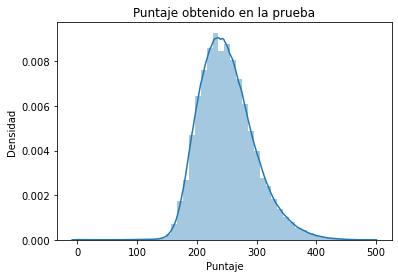

In [41]:
# Código
data = resultados["PUNT_GLOBAL"]
sns.distplot(data)
plt.title('Puntaje obtenido en la prueba')
plt.xlabel('Puntaje')
plt.ylabel('Densidad');

Como se evidenció anteriormente el puntaje promedio está al rededor de los 250 puntos. Se ve que la cola derecha de la distribución está más ancha que la izquierda, esto se debe a que es más facil encontrar resultados positivos que negativos desde un umbral de 150 o menos. 

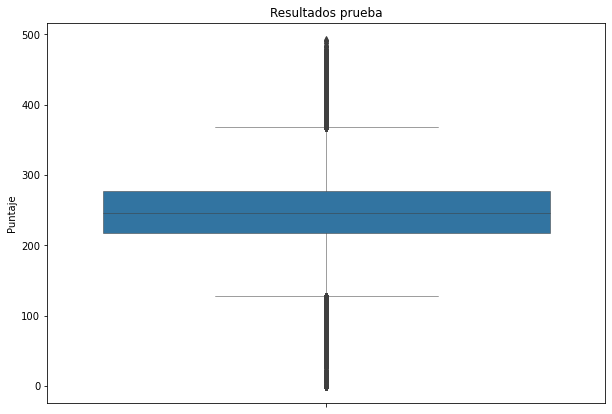

In [66]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(y= "PUNT_GLOBAL", data=resultados, linewidth=0.5)
plt.title("Resultados prueba")
plt.ylabel("Puntaje")
plt.show()

De manera similar se evidencia que los valores por debajo de 130 aproximadamente son sumamente raros, y que el 50% de la población se ubica con resultados de 250 puntos en la prueba. De manera análoga, obtener puntajes por encima de aproximadamente 375 también es muy poco usual en la muestra escogida.

### Resultados prueba según la etnia a la que pertenece

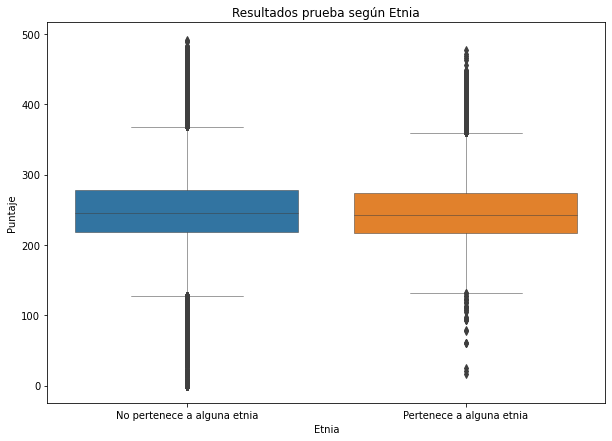

In [62]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(x="etnia", y= "PUNT_GLOBAL", data=resultados, linewidth=0.5)
plt.title("Resultados prueba según Etnia")
plt.ylabel("Puntaje")
plt.xlabel("Etnia")
plt.xticks([0, 1], ['No pertenece a alguna etnia', 'Pertenece a alguna etnia'])
plt.show()

La mediana de los resultados es bastante similar entre aquellos que aseguran pertenecer a alguna etnia. No se evidencia que se tenga resultados especialmente diferentes de aquellos que declaran no pertenecer a una. 

### Distribución del género de la población seleccionada

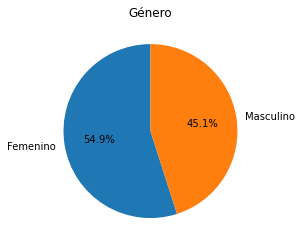

In [43]:
data = resultados['ESTU_GENERO'].value_counts()/resultados['ESTU_GENERO'].value_counts().sum()
plt.pie(data, labels = ["Femenino", "Masculino"], autopct='%1.1f%%', startangle = 90)
plt.title('Género');

Como se evidencia en el grafico anterior, la mayoría de la población en cuestión es de género femenino.

### Resultados obtenidos en la prueba según estrato social.

No handles with labels found to put in legend.


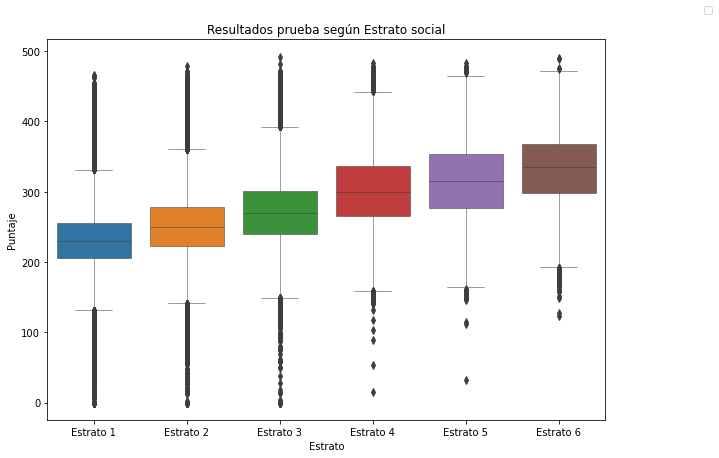

In [44]:
estrato = ["Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6"]

plt.figure(figsize = (10,7))
ax = sns.boxplot(x="FAMI_ESTRATOVIVIENDA", y= "PUNT_GLOBAL", data=resultados, linewidth=0.5, order = estrato)
plt.title("Resultados prueba según Estrato social")
plt.ylabel("Puntaje")
plt.xlabel("Estrato")
plt.legend(bbox_to_anchor=(1, 1, 0.2, 0.1), loc='upper right')
plt.xticks(rotation = 0)
plt.show()

De esta grafica se puede evidenciar que la mediana de los datos va aumentando conforme el estudiante se ubica en un estrato social más alto. Esto es un claro indicador de el nivel de educación que reciben las personas de estratos bajos en comparación con las personas de estratos altos. A nivel estadistico habría que hacer pruebas para determinar si los promedios por grupo difieren entre sí.

### Cantidad de personas que trabajaban al momento de hacer la prueba

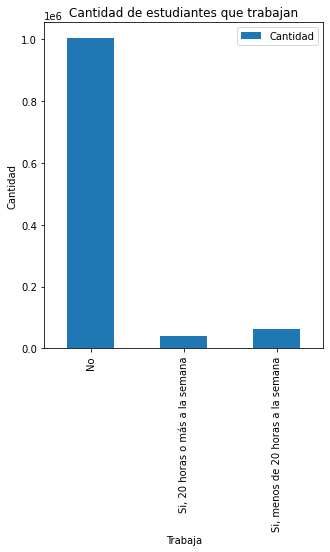

In [45]:
resultados[["ESTU_TRABAJAACTUALMENTE", "PERIODO"]].groupby(["ESTU_TRABAJAACTUALMENTE"]).count().plot(kind="bar", figsize = (5,6),)
plt.xlabel("Trabaja") 
plt.ylabel("Cantidad")
plt.legend(labels = ["Cantidad"])
plt.title("Cantidad de estudiantes que trabajan")
plt.show()

Acá se evidencia que cerca de cien mil personas (eje "y" en notación científica) trabajaban al momento de presentar el examen y sería interesante ver si esto afecta su desempeño en la prueba. La mayoría de estudiantes que presentan el examen no dedica tiempo a un empleo. A continuación se desglosa un poco mejor dicha categoría en función del desempeño obtenido en la prueba por cada uno de los grupos.

No handles with labels found to put in legend.


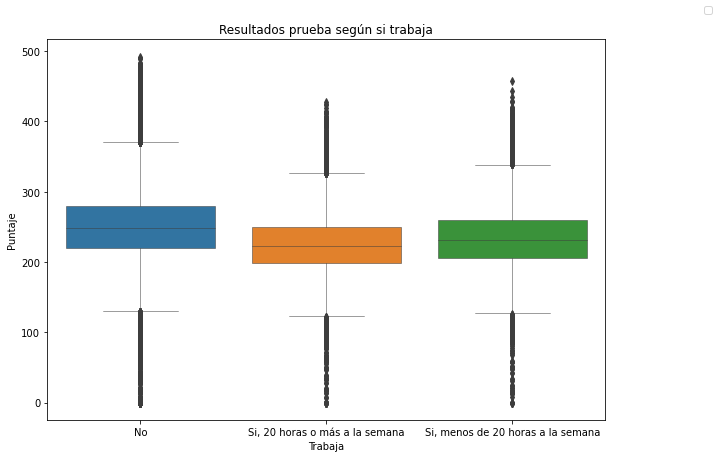

In [46]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(x="ESTU_TRABAJAACTUALMENTE", y= "PUNT_GLOBAL", data=resultados, linewidth=0.5)
plt.title("Resultados prueba según si trabaja")
plt.ylabel("Puntaje")
plt.xlabel("Trabaja")
plt.legend(bbox_to_anchor=(1, 1, 0.2, 0.1), loc='upper right')
plt.xticks(rotation = 0)
plt.show()

  A simple vista es probable que entré más horas se dedique al trabajo es posible que se obtenga un peor desempeño en la prueba, pero se requieren pruebas estadisticas para corroborarlo.

### Puntaje de la prueba de acuerdo a la naturaleza del colegio

No handles with labels found to put in legend.


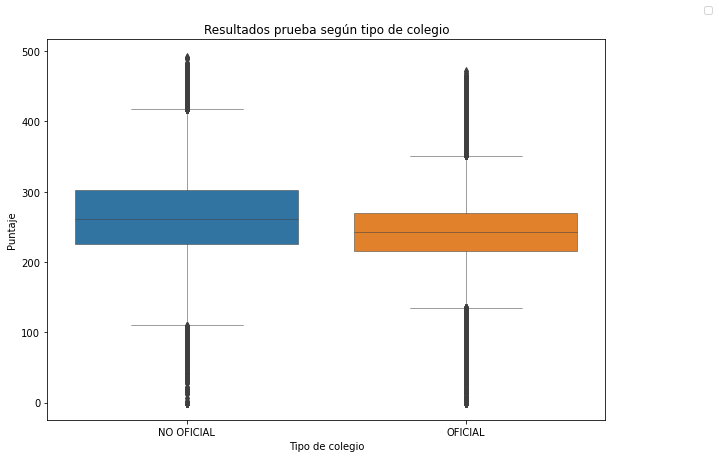

In [47]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(x="COLE_NATURALEZA", y= "PUNT_GLOBAL", data=resultados, linewidth=0.5)
plt.title("Resultados prueba según tipo de colegio")
plt.ylabel("Puntaje")
plt.xlabel("Tipo de colegio")
plt.legend(bbox_to_anchor=(1, 1, 0.2, 0.1), loc='upper right')
plt.xticks(rotation = 0)
plt.show()

De acuerdo con el gráfico, los colegios oficiales suelen tener menor puntaje que los obtenidos por los colegios no oficiales. Esto se deriva de que la mediana para los resultados obtenidos por estudiantes de colegios públicos es menor a la de los estudiantes de colegios privados. En otras palabras, el 50% de la muestra en cuestión suele estar ubicada en rangos de puntajes más bajos para los estudiantes de colegios publicos, en comparación con los estudiantes de colegios privados.

Si bien esta diferencia es inicialmente en cuanto a la distribución, habrá falta hacer pruebas estadisticas que confirme esa diferencia.

### Resultados en la prueba según los ingresos de la familia

No handles with labels found to put in legend.


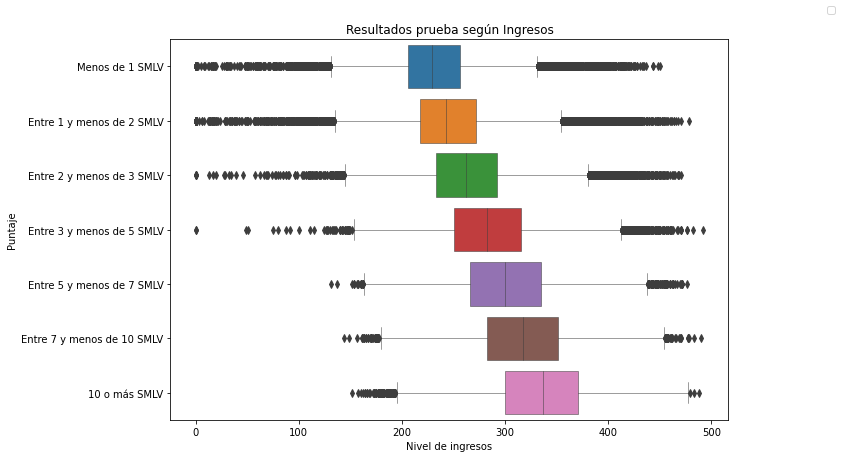

In [48]:
plt.figure(figsize = (10,7))

ingresos = ['Menos de 1 SMLV','Entre 1 y menos de 2 SMLV','Entre 2 y menos de 3 SMLV', 'Entre 3 y menos de 5 SMLV',
            'Entre 5 y menos de 7 SMLV', 'Entre 7 y menos de 10 SMLV','10 o más SMLV']

ax = sns.boxplot(x="PUNT_GLOBAL", y= "FAMI_INGRESOFMILIARMENSUAL", data=resultados, linewidth=0.5, order = ingresos)
plt.title("Resultados prueba según Ingresos")
plt.ylabel("Puntaje")
plt.xlabel("Nivel de ingresos")
plt.legend(bbox_to_anchor=(1, 1, 0.2, 0.1), loc='upper right')
plt.xticks(rotation = 0)
plt.show()

En la grafica anterior se evidencia que a medida que aumentan la categoría de los infresos, va aumentando también la distribución de los resultados de las pruebas. Esto evidencia una clara relación positiva entre las variables en cuestión.

### Resultados de la prueba para según si el individuo manifiesta tener algun tipo de discapacidad

No handles with labels found to put in legend.


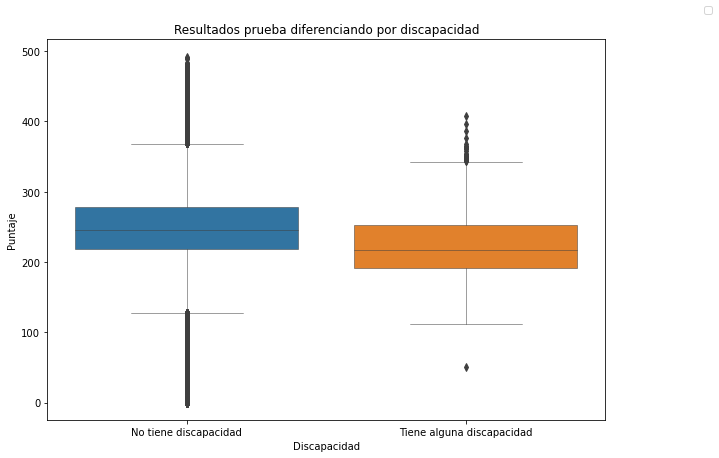

In [49]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(x="discapacidad", y= "PUNT_GLOBAL", data=resultados, linewidth=0.5, )
plt.title("Resultados prueba diferenciando por discapacidad")
plt.ylabel("Puntaje")
plt.xlabel("Discapacidad")
plt.legend(bbox_to_anchor=(1, 1, 0.2, 0.1), loc='upper right')
plt.xticks([0, 1], ['No tiene discapacidad', 'Tiene alguna discapacidad'])
plt.show()

Según se evidencia en la gráfica, el rango intercuantilico del grupo de individuos que asegura tener algún tipo de discapacidad esta desplazado hacia abajo en el rango de puntajes. Es decir que la mediana de los datos se ubica en un valor del puntaje un poco por debajo de la mediana del otro grupo.

### Resultados según área de residencia

No handles with labels found to put in legend.


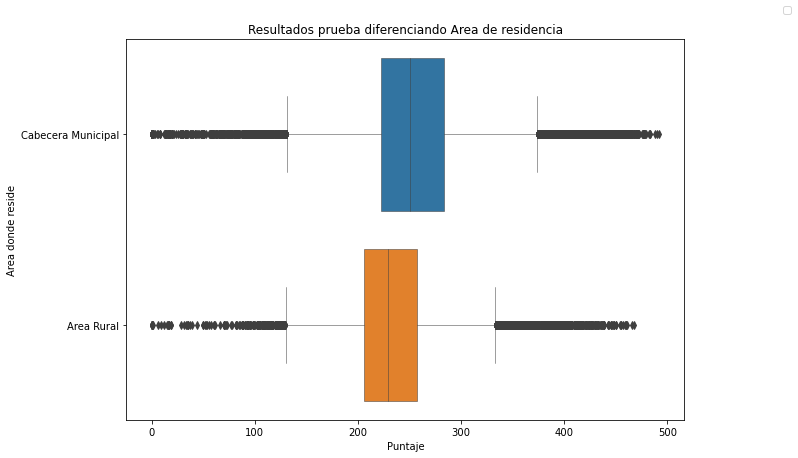

In [50]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(x="PUNT_GLOBAL", y= "ESTU_AREARESIDE", data=resultados, linewidth=0.5, )
plt.title("Resultados prueba diferenciando Area de residencia")
plt.ylabel("Area donde reside")
plt.xlabel("Puntaje")
plt.legend(bbox_to_anchor=(1, 1, 0.2, 0.1), loc='upper right')
plt.show()

Un resultado similar se evidencia cuando se discrimina el puntaje entre estudiantes pertenecientes al área rural en contraste con aquellos que pertenecen al área urbana. Se evidencia que la distribución de los estudiantes del área rural se concentran en su mayoría entre el rango de 150 y 330 puntos aproximadamente. Mientras que los estudiantes del área urbana logran que el cuarto cuartil esté más cerca de los 400 puntos. Esto puede estar asociado a las facilidades y herramientas que los estudiantes de zonas rurales tienen para su proceso educativo, en contraposición a las múltiples limitaciones que las personas del área rural tienen para poder ejercer la misma actividad.

### Análisis del conjunto de las variables

A continuación se empezarán a mirar las variables ya no de manera individual para ver su comportamiento frente al puntaje obtenido, sino viendo cómo interactua con otras variables.

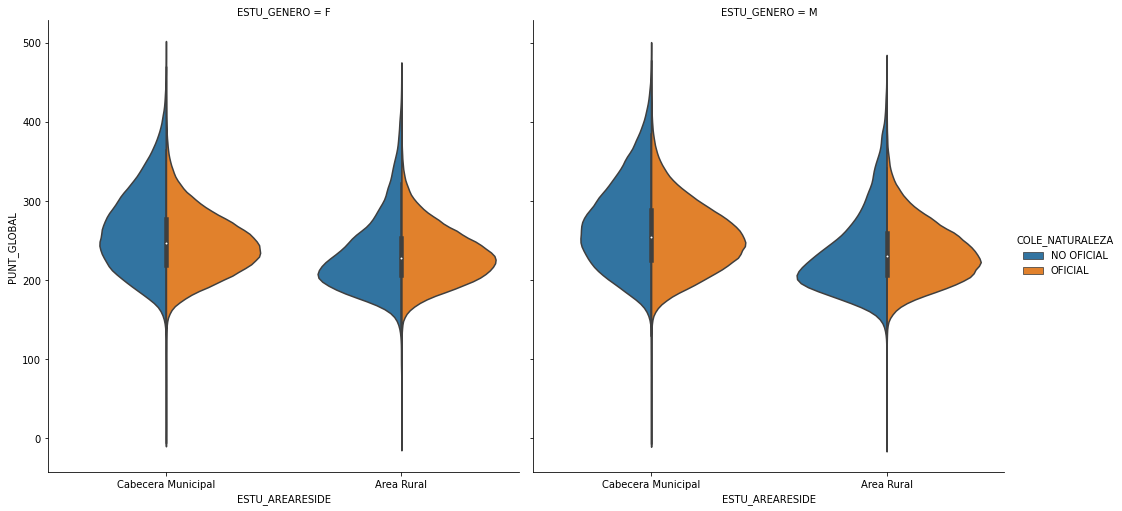

In [51]:
g = sns.catplot(x="ESTU_AREARESIDE", y="PUNT_GLOBAL",
               hue="COLE_NATURALEZA", col="ESTU_GENERO",
               data=resultados, kind="violin", split=True,
                height=7)

En el anterior gráfico se evalúa cómo  difieren los resultados de los estudiantes según su género. Y por cada género se evalua la diferencia en las distribuciones de los estudiantes por tipo de colegio y aréa de residencia.

En gráfico se logra evidenciar que tanto en hombres como en mujeres el hecho de residir en el área rural está relacionado con puntajes más bajos en la prueba. Sin embargo la diferencia de colegios oficiales y no oficiales no es tan clara para esta región en términos de puntaje. Es decir, que los resultados no son claramente diferentes (a primera vista) entre públicos y privados en el área rural. Para el área urbana sí lo es, pues tienden a ser mejores los resultados de los colegios no oficiales.  

### Comparación de ingresos con condiciones sociodemográficas

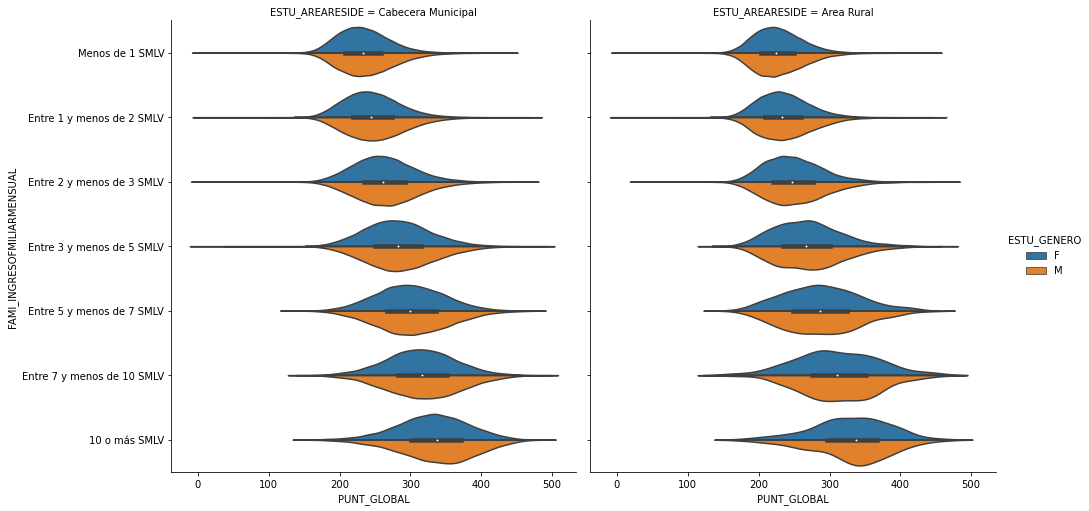

In [52]:
ingresos = ['Menos de 1 SMLV','Entre 1 y menos de 2 SMLV','Entre 2 y menos de 3 SMLV', 'Entre 3 y menos de 5 SMLV',
            'Entre 5 y menos de 7 SMLV', 'Entre 7 y menos de 10 SMLV','10 o más SMLV']

g = sns.catplot(x="PUNT_GLOBAL", y="FAMI_INGRESOFMILIARMENSUAL",
               hue="ESTU_GENERO", col = "ESTU_AREARESIDE",
               data=resultados, kind="violin", split=True,
                height=7, order = ingresos)

En el gráfico se alcanza a evidenciar algo que ya se habia explorado anteriormente. Sin embargo el efecto diferencial del género o del área de residencia no parece ser claro en relación con el puntaje obtenido en la prueba. Lo que si puede interpretarse es que el efecto del ingreso logra cerrar la brecha existente entre la diferencia de áreas de residencia. Es decir, a medida que el ingreso aumenta, el desempeño de las pruebas se equilibra y de repente el pertenecer al área rural ya no es una limitación como se evidenciaba anteriormente para obtener resultados altos en la prueba. Y este efecto parece ser igualmente para hombres y para mujeres.

### Comparación del puntaje obtenido según estrato diferenciando por la presencia de algún tipo de discapacidad 

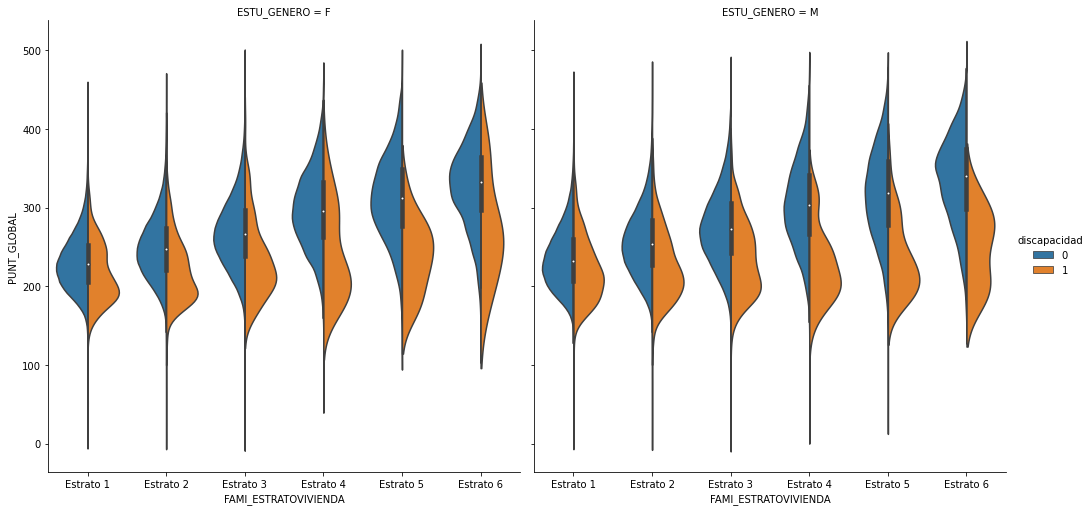

In [163]:
estrato = ["Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6"]


g = sns.catplot(x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL",
               col="ESTU_GENERO", hue= "discapacidad",
               data=resultados, kind="violin", split=True, order = estrato,
                height=7)

En esta gráfica se puede evidenciar el efecto diferenciador del estrato socioeconómico al que pertenece el estudiante con respecto al puntaje obtenido en las pruebas. Al igual que los ingresos, el estrato puede ser un indicador del nivel de estabilidad económica de la familia y por ende de los diferentes medios a la mano que permitan al estudiante, poder acceder a una educación de calidad. 

Si bien poseer la condición de discapacidad es un factor que puede afectar el desempeño en la prueba, en la gráfica se evidencia que hay casos que logran tener resultados por encima del tercer cuartil de los estudiantes de su mismo estrato. Evidenciando que tener una discapacidad no es una limitante para obtener un buen desempeño. 

Algo importante de resaltar del grafico resulta ser que a medida que se avanza hacia estratos altos, la distribución de las personas con discapacidad tiende a separarse de la distribución de las personas que no poseen dicha característica. Mientras que en estratos bajos no es tan clara esta diferenciación.

### Comparación de variables sociodemográficas en contraste con la variable correspondiente a si es elegible para el programa Ser Pilo Paga

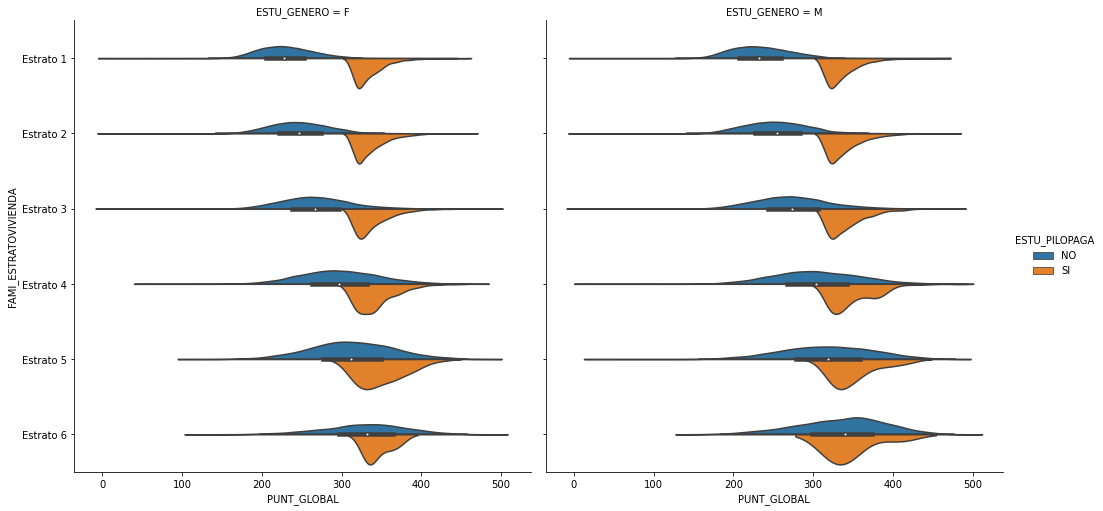

In [54]:
estrato = ["Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6"]
g = sns.catplot(x="PUNT_GLOBAL", y="FAMI_ESTRATOVIVIENDA",
               hue="ESTU_PILOPAGA", col="ESTU_GENERO", order = estrato,
               data=resultados, kind="violin", split=True,
                height=7)

Como es bien sabido, ser elegible para el programa ser pilo paga tiene una cierta cantidad de requerimientos que le permiten financiar sus estidios de educación superior a personas que no tienen la capacidad económica para hacerlo. Además, es necesario tener un rendimiento destacado en las pruebas saber 11 para cumplir con uno de los requisitos.

Como se evidencia en el gráfico, lasa personas que son elegibles para el programa estan distribuidas de color amarillo, y por ende, tienen una mediana para el resultado de la prueba que generalmente es superior a la del grupo en el que se encuentra. No obstante, para los estratos altos esta distribución es bastante similar para los elegibles en el programa como para los que no son elegibles. Esto puede prestarse para interpretar que los estudiantes de estratos altos en general tienen muy buenos puntajes que los hace elegibles para el programa, pero también cumplen con los otros requisitos lo cual pone en duda los propósitos originales del programa. Si bien estas distribuciones no hablan en porcentaje de la población elegida para pertenecer al programa, si da un indicador de cómo se distribuye la población seleccionada. 

### Resultados por tipo de calendario del colegio

No handles with labels found to put in legend.


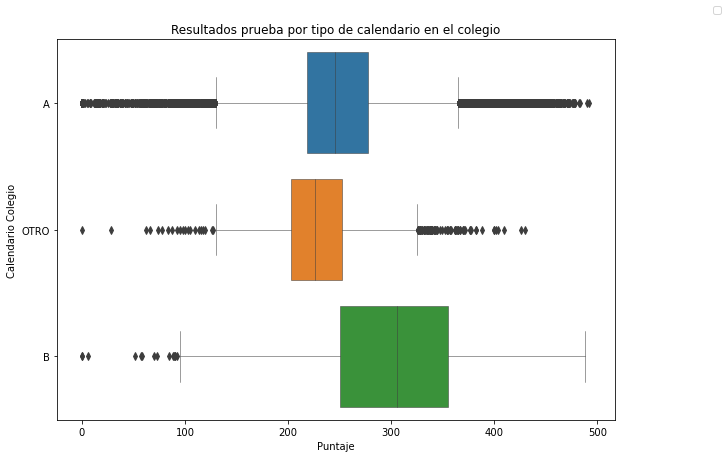

In [55]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(x="PUNT_GLOBAL", y= "COLE_CALENDARIO", data=resultados, linewidth=0.5, )
plt.title("Resultados prueba por tipo de calendario en el colegio")
plt.ylabel("Calendario Colegio")
plt.xlabel("Puntaje")
plt.legend(bbox_to_anchor=(1, 1, 0.2, 0.1), loc='upper right')
plt.show()

De acuerdo con el gráfico, se puede inferir que al discriminar por los tipos de colegio hay una diferencia en los resultados obtenidos por cada grupo. En primer lugar están los colegios calendario B. Allí, se tiene una media de más de 300 puntos en la prueba, con resultados bastante altos en el ultimo cuartil. No obstante, si se compara con la categoría otros, esta tiene un rango intercuartílico que está más inclinado hacia los 200 puntos. Esta categoría hace referencia a los estudiantes que presentan sus pruebas por cuenta propia sin representar a ninguna institución educativa. Y por ultimo tenemos a los colegios de calendario A, que son la modalidad de colegio más común. Estos estudiantes tienen una distribución con una mediana de resultados cercanos a 250 puntos como se ha venido evidenciando a lo largo del análisis. Lo importante a resaltar es que el tipo de colegio juega un papel importante puesto que habla de la calidad de la formación recibida. Es posible que esta sea una variable bastante relevante en el análisis que se hara posteriormente.

### Resultados por tipo de colegio y género

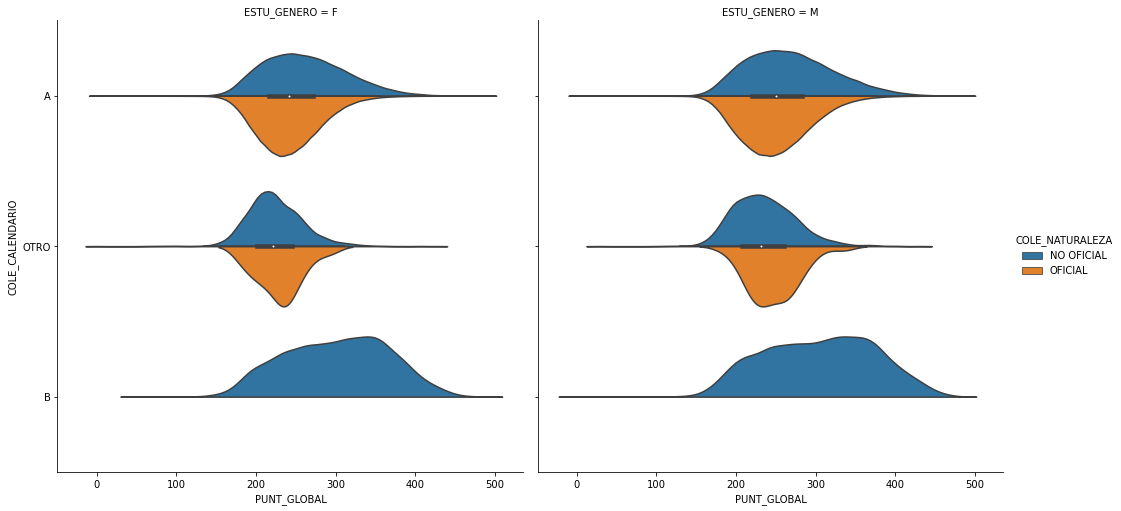

In [166]:
g = sns.catplot(x="PUNT_GLOBAL", y="COLE_CALENDARIO",
               hue="COLE_NATURALEZA", col="ESTU_GENERO",
               data=resultados, kind="violin", split=True,
                height=7)

En concordancia con el análisis hecho previo a la gráfica, se puede evidenciar que si bien los colegios con mejores resultados en la prueba son de calendario B, ninguno de estos pertenece a la categoría de oficial, es decir que todos los colegios de calendario B son privados. Ahi se encuentra un aspecto muy importante a resaltar de la educación en el país, que habla de que la calidad de la educación está en gran medida correlacionada con el nivel de ingresos de un hogar.

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

## 3.1 Conceptualización del modelo



Dado el analisis hecho previamente, se ha encontrado multiples factores del ámbito socioeconómico que posibilitan tener mejor desempeño en la prueba Saber 11. También se ha encontrado que algunas carácterísticas intrínsecas del sector de la sociedad al que se pertenece dificulta acceder a las herramientas necesarias para tener una educación de calidad, sin embargo a pesar de esto, hay estudiantes que logran superar dichas barreras y obtener puntajes bastante sobresalientes en la prueba.

Es por ello que el presente análisis considera la probabilidad de obtener resultados en la prueba por encima del 75% de la población, considerando una serie de factores socioeconómicos propios del individuo.

In [83]:
# Para ello se define la base de datos propia para esta misión:
resultados_M3 = resultados

# Obtener el valor que corresponde al percentil seleccionado.
alfa = 75
per_np = np.percentile(resultados["PUNT_GLOBAL"], alfa)

# Generamos la variable dummy para aquellos que obtuvieron puntajes por encima del 75% de la población:
resultados_M3["y"] = (resultados_M3["PUNT_GLOBAL"] > per_np)*1

In [99]:
# Definimos todas las variables independientes.
X_modelo = resultados_M3[["ESTU_GENERO", "ESTU_AREARESIDE", "ESTU_VECESPRESENTOEXAMEN", "FAMI_ESTRATOVIVIENDA",
                   "FAMI_INGRESOFMILIARMENSUAL","ESTU_TRABAJAACTUALMENTE", "COLE_NATURALEZA", "COLE_CALENDARIO",
                   "discapacidad", "etnia"]]

In [100]:
X_ = pd.get_dummies(X, columns = ["ESTU_GENERO", "ESTU_AREARESIDE", "ESTU_VECESPRESENTOEXAMEN", "FAMI_ESTRATOVIVIENDA",
                                  "FAMI_INGRESOFMILIARMENSUAL","ESTU_TRABAJAACTUALMENTE",
                                  "COLE_NATURALEZA", "COLE_CALENDARIO"])

In [104]:
X = X_[["discapacidad", "ESTU_GENERO_M","etnia","ESTU_AREARESIDE_Cabecera Municipal","ESTU_VECESPRESENTOEXAMEN_Una vez",
        "ESTU_VECESPRESENTOEXAMEN_Dos veces","ESTU_VECESPRESENTOEXAMEN_Tres veces o más","FAMI_ESTRATOVIVIENDA_Estrato 2",
        "FAMI_ESTRATOVIVIENDA_Estrato 3","FAMI_ESTRATOVIVIENDA_Estrato 4", "FAMI_ESTRATOVIVIENDA_Estrato 5",
        "FAMI_ESTRATOVIVIENDA_Estrato 6", "FAMI_INGRESOFMILIARMENSUAL_Entre 1 y menos de 2 SMLV",
        "FAMI_INGRESOFMILIARMENSUAL_Entre 2 y menos de 3 SMLV","FAMI_INGRESOFMILIARMENSUAL_Entre 3 y menos de 5 SMLV",
        "FAMI_INGRESOFMILIARMENSUAL_Entre 5 y menos de 7 SMLV","FAMI_INGRESOFMILIARMENSUAL_Entre 7 y menos de 10 SMLV",
        "FAMI_INGRESOFMILIARMENSUAL_10 o más SMLV", "ESTU_TRABAJAACTUALMENTE_Si, 20 horas o más a la semana",
        "ESTU_TRABAJAACTUALMENTE_Si, menos de 20 horas a la semana", "COLE_NATURALEZA_NO OFICIAL","COLE_CALENDARIO_B",
        "COLE_CALENDARIO_OTRO"]]

y = resultados_M3["y"]

In [175]:
# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Declaramos una instancia del modelo
lr = LogisticRegression()

# Entrenamos el modelo
modelo = lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

Verificación de la precisión del modelo:

In [176]:
lr.score(X_test, y_test)

0.7890613004326346

In [177]:
matriz = confusion_matrix(y_test, y_pred)
pd.DataFrame({
                '1': [matriz[0][0], matriz[1][0]],
                '0': [matriz[0][1], matriz[1][1]]
                 },
            index = [1,0]
)

,1,0
1,159104,8268
0,38441,15621


In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87    167372
           1       0.65      0.29      0.40     54062

    accuracy                           0.79    221434
   macro avg       0.73      0.62      0.64    221434
weighted avg       0.77      0.79      0.76    221434



Regresión Logística: ROC AUC=  0.75123227745492


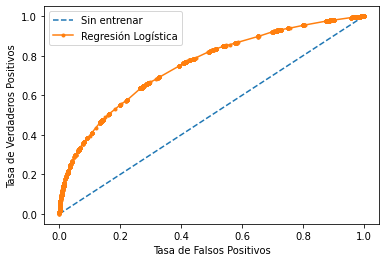

In [179]:
#AUC y Curva ROC
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(X_test)

# PREDECIR las probabilidades
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('Regresión Logística: ROC AUC= ' ,lr_auc)

# las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

Como se evidencia, el modelo alcanza un nivel de predicción de cerca del 80%. Esto quiere decir que el modelo puede distinguir entre verdaderos positivos y negativos cerca de 8 de cada 10 veces. Además, se tienen otras medidas de desempeño del modelo como lo son la precisión, sensitividad, y el F1 score. Todas estas medidas nos hablan de la bondad en las predicciones.

Es posible que el modelo se pueda mejorar incliyendo otras variables que tambien logren reflejar la situación de la población. Sin embargo hasta el momento, el modelo planteado tiene un ajuste adecuado para la predicción.

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Para la visualización correspondiente se han seleccionado las variables que están presentes en el modelo de regresión anterior. Para poder visualizarlas solo hace falta seleccionar una y esta desplegara su comportamiento de acuerdo con el score que se seleccione. De esta manera el usuario podrá jugar con las variables y ver su comportamiento con forme al score que se seleccione como límite. En caso de seleccionar la variable "Todos" se mostrará la distribución del puntaje para toda la muestra.

In [146]:
# Arreglamos la base a usar para la mision actual.
base_visual = resultados_M3[["ESTU_GENERO", "FAMI_INGRESOFMILIARMENSUAL", "discapacidad", "etnia", "ESTU_TRABAJAACTUALMENTE",
                            "FAMI_ESTRATOVIVIENDA","COLE_NATURALEZA","COLE_CALENDARIO","PUNT_GLOBAL"]]

lista = base_visual.columns.tolist()
lista.insert(0,"Todos")

In [160]:
def seleccionar(lista, score):
    df = base_visual
    if lista != "Todos":
        plt.figure(figsize = (10,7))
        ax = sns.boxplot(x="PUNT_GLOBAL", y= df[lista], data=resultados, linewidth=0.5, )
        plt.xlabel("Puntaje")
        plt.legend(bbox_to_anchor=(1, 1, 0.2, 0.1), loc='upper right')
        plt.show()
    else:
        data = df["PUNT_GLOBAL"]
        sns.distplot(data)
        plt.title('Puntaje obtenido en la prueba')
        plt.xlabel('Puntaje')
        plt.ylabel('Densidad');

interactive_plot = interactive(
                                seleccionar, 
                                lista = lista,
                                score = (base_visual["PUNT_GLOBAL"].min(), base_visual["PUNT_GLOBAL"].max(), 20) 
                                
                              )
display(interactive_plot)

interactive(children=(Dropdown(description='lista', options=('Todos', 'ESTU_GENERO', 'FAMI_INGRESOFMILIARMENSU…